1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy as sp
from math import pi
from math import e
%matplotlib inline

In [2]:
media=0
std_dev=1
a=np.random.normal(media,std_dev,500)
print(a)

[ 3.54751920e-01  1.80384137e+00 -1.24367198e+00  5.01280415e-01
  1.32246529e+00  1.75905899e-01 -1.90140547e+00 -4.25146118e-01
 -4.91656963e-02  1.34129533e+00  1.79830291e+00 -3.93694641e-01
  1.38909595e+00  1.08248759e+00 -1.38113920e+00  1.05469229e+00
  1.33494742e+00  3.57702389e-01 -1.05829940e+00 -7.17340730e-01
 -2.20650045e+00  1.22567904e+00 -4.61130740e-01  3.41159850e-01
 -2.48347300e+00  8.43401610e-03  1.93232606e+00 -1.45023818e+00
  1.30246560e-01 -9.35296570e-01 -4.30302224e-01  6.73734940e-01
 -3.46709131e-01 -2.09997320e+00  1.94722460e+00 -1.96247214e+00
 -1.99604970e-01 -2.14020220e-01  6.39215423e-01 -8.20068177e-01
 -9.92292396e-01 -3.19775055e-01  3.95405291e-01 -6.85534619e-01
  6.77823356e-01 -2.90695943e-01 -5.58336899e-01 -1.15591063e+00
  3.79817942e-01 -1.19562942e-01 -3.42222574e-01 -4.84657834e-01
  1.35606218e+00  3.10248645e-01  8.92934802e-01 -8.99466019e-01
 -6.05360259e-01 -1.77018734e-01 -3.49025092e-01 -4.45898615e-01
  3.07536809e-03  4.65937

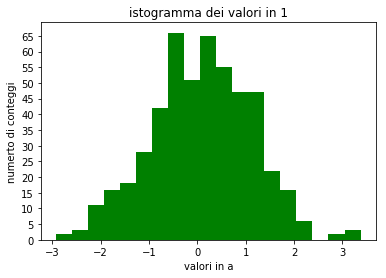

In [3]:
plt.hist(a,bins="auto",color='green')
plt.xlabel("valori in a")
plt.ylabel("numerto di conteggi")
plt.title("istogramma dei valori in 1")
plt.yticks(np.arange(0, 75, step=5))
n,bins,patches=plt.hist(a,bins="auto",color='green')



(19,) (19,) (19,)


<ErrorbarContainer object of 3 artists>

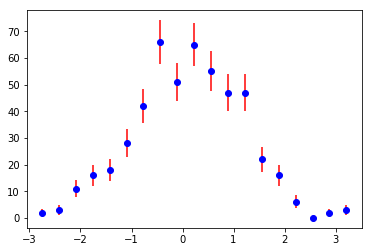

In [4]:

errori=np.array(n**0.5)
b=np.zeros(len(bins)-1)
for i in range(len(b)):
    b[i]=(bins[i]+bins[i+1])/2

print(b.shape,n.shape,errori.shape)

x=b
y=n
yerr=errori

plt.errorbar(x,y,yerr,fmt="o",color="blue",ecolor="red")

[[0.05399097 0.05848724 0.06325461 ... 0.06325461 0.05848724 0.05399097]
 [0.05399097 0.05848724 0.06325461 ... 0.06325461 0.05848724 0.05399097]
 [0.05399097 0.05848724 0.06325461 ... 0.06325461 0.05848724 0.05399097]
 ...
 [0.05399097 0.05848724 0.06325461 ... 0.06325461 0.05848724 0.05399097]
 [0.05399097 0.05848724 0.06325461 ... 0.06325461 0.05848724 0.05399097]
 [0.05399097 0.05848724 0.06325461 ... 0.06325461 0.05848724 0.05399097]]
11838.566151902747


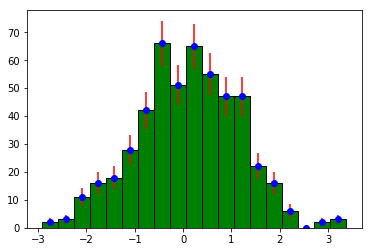

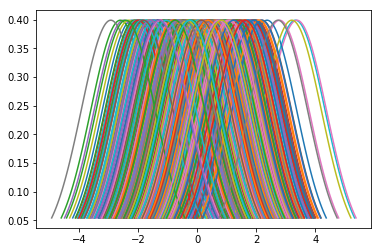

In [15]:
figura1=plt.figure(1)
plt.hist(a,bins="auto",color='green',ec="black")
plt.errorbar(x,y,yerr,fmt="o",color="blue",ecolor="red")


dev_std=1.06*a.std()*(a.size**(1/5))
gaussiane=np.zeros((len(a),100))
for i in range(len(a)):
    X=np.linspace(a[i]-2,a[i]+2,100)
    gaussiane[i]=stats.norm.pdf(X,loc=a[i],scale=std_dev)
    figura2=plt.figure(2)
    plt.plot(X,gaussiane[i])
    

print(somma_gauss)
#integral=sp.integrate.trapz(somma_gauss)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2018-12-03 11:49:42--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2018-12-03 11:49:42--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc18a210e780f8a4b20b512e4c0b.dl.dropboxusercontent.com/cd/0/inline/AWzP8FoUYtM_cmsuBmA9xSieiguoiB-6lTnqr92dX5lL82PHT9W6uiGpMxNgNSWd7Uiu-bsJ0OybF2w8ycKuj2d5058l7gZ47u10drxtKz3n7liIH0pu73QcSoNl5Zr54B4uwxNtpfBXPWFLOHuVzmuziOkF-WBB4UY7oIClkwEp1x7qyG7Eh73ltxcCHdmug64/file [segue]
--2018-12-03 11:49:42--  https://uc18a210e780f8a4b20b512e4c0b.dl.dropboxusercontent.com/cd/0/

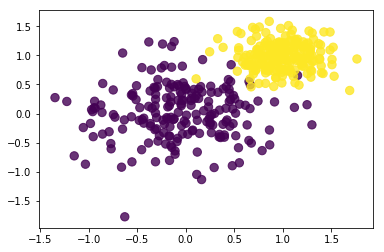

In [8]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot